
# Ex 4. Time-Lapse ERT Inversion Techniques

This example demonstrates different approaches for time-lapse electrical 
resistivity tomography (ERT) inversion using PyHydroGeophysX.

The example includes:
1. Full time-lapse inversion with temporal regularization
2. Windowed time-lapse inversion for large datasets
3. L1-norm regularized inversion for sharp boundary recovery
4. Comparison of different inversion strategies
5. Visualization of resistivity evolution over time

Time-lapse ERT inversion is crucial for monitoring subsurface water 
content changes and understanding hydrological processes in watersheds.
The temporal regularization helps maintain consistency between consecutive
time steps while allowing for realistic changes.


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Setup package path for development
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()

# Add the parent directory to Python path
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import PyHydroGeophysX modules
from PyHydroGeophysX.inversion.time_lapse import TimeLapseERTInversion
from PyHydroGeophysX.inversion.windowed import WindowedTimeLapseERTInversion

In [2]:
data_dir = "C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]

## 1.Full L2 Time-Lapse Inversion



#################### FUll Time-Lapse Inversion #####################



In [3]:
# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

23/05/25 - 09:43:08 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:08 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Found 2 regions.


Starting time-lapse inversion...


23/05/25 - 09:43:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 09:43:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:43:09 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 09:43:22 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:43:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:43:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 09:43:34 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:43:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:43:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 09:43:45 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:43:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:43:45 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 09:43:56 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:43:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:43:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 09:44:07 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:44:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:44:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 09:44:19 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:44:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:44:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 09:44:30 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:44:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:44:30 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 09:44:42 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:44:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:44:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 09:44:53 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:44:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:44:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 09:45:06 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:45:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:45:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 09:45:18 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 09:45:18 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 09:45:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 23302920.932678957, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 67.57962559809444
dPhi: 0.9711851075715995
ERTphi_d: 671471.1599426663, ERTphi_m: 18389.225813192224, ERTphi_t: 7058.104038960887


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 5.249409590940494
dPhi: 0.9223226002736464
ERTphi_d: 52158.13369558475, ERTphi_m: 7683.605669950237, ERTphi_t: 6979.314976114533


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 1.5978762083041012
dPhi: 0.6956083954542738
ERTphi_d: 15876.498005709549, ERTphi_m: 6949.9306996584355, ERTphi_t: 6957.5889914593745


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.5611925811384244
dPhi: 0.02295774039004608
ERTphi_d: 15512.009486191386, ERTphi_m: 6969.761979344233, ERTphi_t: 6915.711644473477


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.5472961932702072
dPhi: 0.008901136244244743
ERTphi_d: 15373.93497633278, ERTphi_m: 6896.94432267017, ERTphi_t: 6922.448977024449


-------------------ERT Iteration: 6 ---------------------------


ERT chi2: 1.548435574860739
dPhi: 0.0007363694136180611
ERTphi_d: 15385.255871816304, ERTphi_m: 6878.642274339606, ERTphi_t: 6925.3099767557715
Convergence reached at iteration 6


End of inversion
Inversion complete!


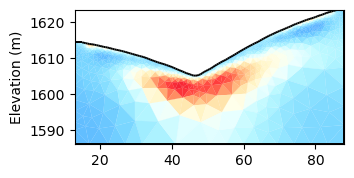

<Figure size 640x480 with 0 Axes>

In [4]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()

## 2. Window L2 time-lapse inversion



Measurement times (can be timestamps or any sequential numbers representing time)



In [5]:
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh=mesh,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

23/05/25 - 10:13:12 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:13:12 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


23/05/25 - 10:13:14 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:13:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:13:14 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:13:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:13:14 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:13:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:13:14 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:13:14 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:13:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 10:13:26 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:13:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:13:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:13:37 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:13:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:13:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2614.857697445681
dPhi: 1.0
ERTphi_d: 6495306.520455072, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 57.164317698649086
dPhi: 0.9781386506216037
ERTphi_d: 141996.16516344433, ERTphi_m: 2133.0873813623575, ERTphi_t: 2019.3387796409763


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 22.559461643734338
dPhi: 0.605357633014004
ERTphi_d: 56037.7027230361, ERTphi_m: 1094.5833426333168, ERTphi_t: 1990.3722497931892


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.934018245179645
dPhi: 0.5153245047309691
ERTphi_d: 27160.10132102624, ERTphi_m: 777.9858843588015, ERTphi_t: 2016.17864894502


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.4114684837928035
dPhi: 0.8709103595638262
ERTphi_d: 3506.087713741324, ERTphi_m: 824.8510499031497, ERTphi_t: 2007.16388325989
Convergence reached at iteration 4


End of inversion

Window 0 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 1


23/05/25 - 10:15:35 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:15:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:15:35 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:15:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:15:35 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:15:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:15:35 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:15:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:15:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 10:15:46 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:15:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:15:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:15:57 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:15:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:15:57 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2424.799586453877
dPhi: 1.0
ERTphi_d: 6023202.17275143, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 49.16035295797773
dPhi: 0.9797260139631284
ERTphi_d: 122114.31674761669, ERTphi_m: 2030.269450941808, ERTphi_t: 201.6601216181947


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 24.909161158028173
dPhi: 0.4933079268303764
ERTphi_d: 61874.356316541984, ERTphi_m: 1047.2904649735415, ERTphi_t: 196.0668666182517


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.8360439206269
dPhi: 0.5649775658087762
ERTphi_d: 26916.73309883722, ERTphi_m: 683.3649031175426, ERTphi_t: 185.1905437814469


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.2213068146887063
dPhi: 0.8872921867394895
ERTphi_d: 3033.7261276867466, ERTphi_m: 749.3175938313286, ERTphi_t: 185.18620691596482
Convergence reached at iteration 4


End of inversion

Window 1 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 2


23/05/25 - 10:17:54 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:17:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:17:54 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:17:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:17:54 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:17:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:17:54 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:17:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:17:54 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 10:18:06 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:18:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:18:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:18:17 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:18:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:18:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2361.2976889094757
dPhi: 1.0
ERTphi_d: 5865463.459251137, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 46.753673615642825
dPhi: 0.9802000087345042
ERTphi_d: 116136.12526125678, ERTphi_m: 2035.4901318344241, ERTphi_t: 271.6353589066119


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 25.440308672174226
dPhi: 0.45586503252522137
ERTphi_d: 63193.72674168077, ERTphi_m: 1048.2929033758178, ERTphi_t: 268.2991003719209


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.645416742743372
dPhi: 0.5815531611695035
ERTphi_d: 26443.215188974536, ERTphi_m: 704.7403493891915, ERTphi_t: 261.1560539764172


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3259837789844293
dPhi: 0.875440876479701
ERTphi_d: 3293.7437069973225, ERTphi_m: 767.1499804355055, ERTphi_t: 258.77455693463804
Convergence reached at iteration 4


End of inversion

Window 2 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 3


23/05/25 - 10:20:14 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:20:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:20:14 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:20:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:20:15 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:20:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:20:15 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:20:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:20:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 10:20:26 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:20:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:20:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:20:37 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:20:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:20:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2335.406380855519
dPhi: 1.0
ERTphi_d: 5801149.450045109, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 46.55779922597936
dPhi: 0.980064369264537
ERTphi_d: 115649.57327733273, ERTphi_m: 2015.863764922243, ERTphi_t: 246.01473761025713


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 25.849145149708786
dPhi: 0.44479452251933543
ERTphi_d: 64209.276551876625, ERTphi_m: 1001.695043301068, ERTphi_t: 247.25632890723426


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.735353259803906
dPhi: 0.5846921359438129
ERTphi_d: 26666.6174973529, ERTphi_m: 672.1167069690493, ERTphi_t: 239.3707276644846


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3377775141028405
dPhi: 0.8753857947915096
ERTphi_d: 3323.039345031456, ERTphi_m: 720.2465794456509, ERTphi_t: 238.7667764509362
Convergence reached at iteration 4


End of inversion

Window 3 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 4


23/05/25 - 10:22:40 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:22:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:22:40 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:22:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:22:40 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:22:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:22:40 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:22:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:22:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 10:22:52 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:22:52 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:22:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:23:04 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:23:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:23:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2119.5610754349227
dPhi: 1.0
ERTphi_d: 5264989.711380348, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 43.202854049034485
dPhi: 0.9796170751813936
ERTphi_d: 107315.88945780166, ERTphi_m: 2036.5151479621532, ERTphi_t: 1915.5347415701056


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 24.88323257838482
dPhi: 0.42403729739376045
ERTphi_d: 61809.9497247079, ERTphi_m: 1012.9554998178853, ERTphi_t: 1887.0580086770203


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 9.431407321954547
dPhi: 0.6209733887168954
ERTphi_d: 23427.615787735092, ERTphi_m: 734.9507224627791, ERTphi_t: 1888.502365266995


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.5054398702610894
dPhi: 0.8403801448849837
ERTphi_d: 3739.512637728546, ERTphi_m: 768.7491998206372, ERTphi_t: 1875.5125318734451


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.163627488520244
dPhi: 0.22705150068967195
ERTphi_d: 2890.450681484286, ERTphi_m: 743.8229474253515, ERTphi_t: 1869.4042827801857
Convergence reached at iteration 5


End of inversion

Window 4 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 5


23/05/25 - 10:25:34 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:25:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:25:34 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:25:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:25:34 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:25:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:25:34 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:25:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:25:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 10:25:45 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:25:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:25:45 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:25:56 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:25:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:25:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1950.723115414603
dPhi: 1.0
ERTphi_d: 4845596.218689874, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 41.52492225188705
dPhi: 0.9787130618775379
ERTphi_d: 103147.90687368743, ERTphi_m: 2020.7617151913857, ERTphi_t: 1928.3968844442693


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 23.359865451422316
dPhi: 0.4374495077986388
ERTphi_d: 58025.90578133303, ERTphi_m: 1051.8974890661163, ERTphi_t: 1907.4590861345814


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 8.186874557441833
dPhi: 0.6495324609438897
ERTphi_d: 20336.196400685512, ERTphi_m: 756.3855066296782, ERTphi_t: 1917.98790785652


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.423633472445303
dPhi: 0.8261078189904318
ERTphi_d: 3536.3055455541326, ERTphi_m: 788.4174762384442, ERTphi_t: 1902.3244480419285
Convergence reached at iteration 4


End of inversion

Window 5 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 6


23/05/25 - 10:27:58 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:27:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:27:58 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:27:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:27:58 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:27:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:27:58 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:27:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:27:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 10:28:10 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:28:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:28:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:28:21 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:28:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:28:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1883.650824187547
dPhi: 1.0
ERTphi_d: 4678988.6472818665, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 44.843213112054585
dPhi: 0.9761934576534925
ERTphi_d: 111390.54137034359, ERTphi_m: 1953.1141443205156, ERTphi_t: 1358.1849249731545


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 22.494766705044903
dPhi: 0.49836853463566944
ERTphi_d: 55877.00049533154, ERTphi_m: 1037.7283664174954, ERTphi_t: 1330.480769587637


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 7.983632123375079
dPhi: 0.6450893566464688
ERTphi_d: 19831.342194463698, ERTphi_m: 725.5824145371843, ERTphi_t: 1345.251292037312


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3677546309519382
dPhi: 0.8286801533668713
ERTphi_d: 3397.5025032846142, ERTphi_m: 765.6569645581452, ERTphi_t: 1334.4146975946155
Convergence reached at iteration 4


End of inversion

Window 6 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 7


23/05/25 - 10:30:23 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:30:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:30:23 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:30:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:30:23 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:30:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:30:23 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:30:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:30:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 10:30:35 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:30:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:30:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:30:46 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:30:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:30:47 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2080.9823041318746
dPhi: 1.0
ERTphi_d: 5169160.043463577, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 53.03915902101021
dPhi: 0.9745124411122099
ERTphi_d: 131749.27100818936, ERTphi_m: 1898.2785186005196, ERTphi_t: 1438.171703526307


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 20.890467577057784
dPhi: 0.6061312441099882
ERTphi_d: 51891.92146141153, ERTphi_m: 999.1856233822501, ERTphi_t: 1402.7048399651846


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 8.494744738267192
dPhi: 0.5933674195212248
ERTphi_d: 21100.945929855705, ERTphi_m: 668.7635958592597, ERTphi_t: 1397.500987641467


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3289414191908369
dPhi: 0.8435572274227133
ERTphi_d: 3301.0904852700387, ERTphi_m: 719.3911315700248, ERTphi_t: 1387.920625364652
Convergence reached at iteration 4


End of inversion

Window 7 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 8


23/05/25 - 10:32:44 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:32:44 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:32:45 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:32:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:32:45 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:32:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:32:45 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:32:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:32:45 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 10:32:55 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:32:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:32:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:33:07 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:33:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:33:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2339.9500473783282
dPhi: 1.0
ERTphi_d: 5812435.917687767, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 60.966832647433776
dPhi: 0.9739452418158495
ERTphi_d: 151441.6122962255, ERTphi_m: 1919.1107616247477, ERTphi_t: 690.366437726001


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 21.218758167545793
dPhi: 0.6519622679063526
ERTphi_d: 52707.39528818375, ERTphi_m: 944.7931411835075, ERTphi_t: 672.2426047354256


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 9.888574502865058
dPhi: 0.533970158631164
ERTphi_d: 24563.219065116806, ERTphi_m: 613.2944721883149, ERTphi_t: 676.540136733675


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.2898358917148298
dPhi: 0.8695630101850251
ERTphi_d: 3203.9523550196373, ERTphi_m: 661.4094526631699, ERTphi_t: 671.9399032489207
Convergence reached at iteration 4


End of inversion

Window 8 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 9


23/05/25 - 10:35:04 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:35:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:35:04 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:35:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:35:04 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:35:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:35:04 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:35:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:35:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 10:35:15 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:35:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:35:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:35:26 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:35:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:35:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2547.2932024544716
dPhi: 1.0
ERTphi_d: 6327476.314896908, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 62.80594485816645
dPhi: 0.9753440456726186
ERTphi_d: 156009.96702768546, ERTphi_m: 2154.576406081069, ERTphi_t: 930.4858356252371


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 21.75304567947955
dPhi: 0.653646709262888
ERTphi_d: 54034.5654678272, ERTphi_m: 1116.1685797679256, ERTphi_t: 909.6400546417042


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.479359220385332
dPhi: 0.518257839624228
ERTphi_d: 26030.728303437165, ERTphi_m: 804.2195855689072, ERTphi_t: 909.2124003982308


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3134546784348198
dPhi: 0.8746626916004772
ERTphi_d: 3262.6214212320924, ERTphi_m: 854.9272936449502, ERTphi_t: 905.3651457727227
Convergence reached at iteration 4


End of inversion

Window 9 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Final result summary:
Model shape: (1364, 12)
Number of coverage arrays: 12
Number of chi2 values: 51
Mesh exists: True
Inversion complete!


In [6]:
result.final_models = np.array(result.final_models)
result.final_models.shape

(1364, 12)

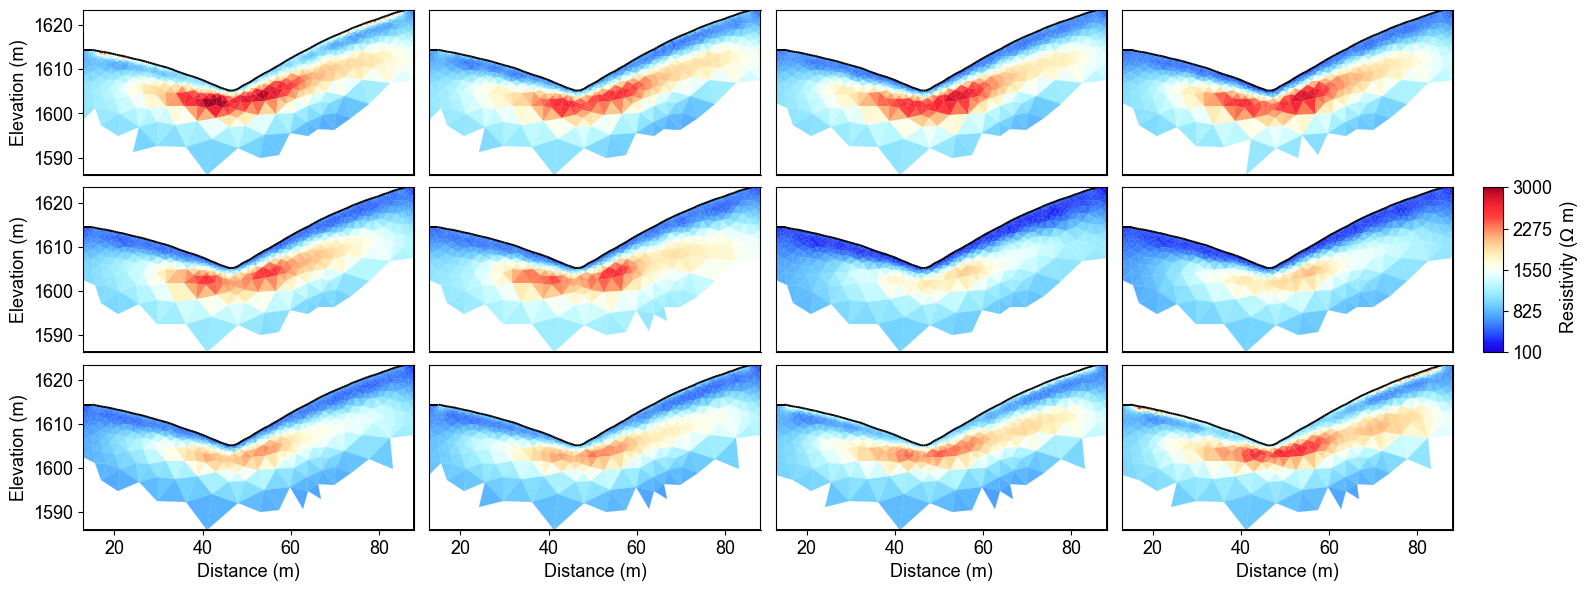

In [7]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i]>-1.2)
    
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()

## 3. Full L1 Time-lapse Inversion



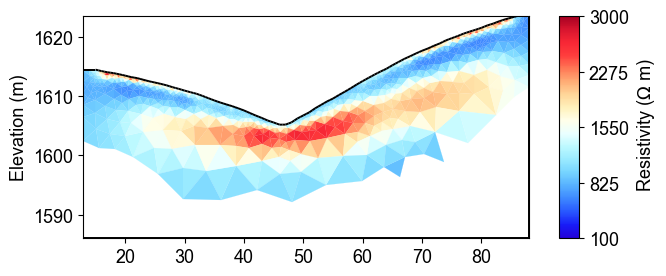

In [8]:
ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',logScale=False,coverage=result.all_coverage[i]>-1)

Full paths to data files



In [9]:
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L1"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result_L1 = inversion.run()
print("Inversion complete!")

23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


Starting time-lapse inversion...


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Found 2 regions.


23/05/25 - 10:37:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:37:27 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
------------------- IRLS Iteration: 1 ---------------------------
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 10:37:41 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:37:41 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:37:41 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:37:52 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:37:52 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:37:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:38:02 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:38:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:38:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:38:14 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:38:14 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:38:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:38:26 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:38:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:38:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:38:38 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:38:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:38:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:38:51 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:38:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:38:51 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:39:03 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:39:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:39:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:39:16 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:39:16 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:39:16 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:39:29 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:39:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:39:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


23/05/25 - 10:39:43 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 10:39:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 10:39:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 9774345.116330786, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 27.88963513425549
dPhi: 0.9881082970030013
ERTphi_d: 796718.9534225835, ERTphi_m: 17837.0946839594, ERTphi_t: 3813.04219342133


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 6.960649922022051
dPhi: 0.7504216212039067
ERTphi_d: 349998.6534278479, ERTphi_m: 30168.929871750755, ERTphi_t: 12984.687320425859


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 3.36707726589265
dPhi: 0.5162697013047708
ERTphi_d: 247935.0044197471, ERTphi_m: 37053.57410935055, ERTphi_t: 17688.690269343482


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 2.33941642420425
dPhi: 0.3052085712728531
ERTphi_d: 211258.72731429807, ERTphi_m: 41537.44683691107, ERTphi_t: 20109.856778615995


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.9348220931989437
dPhi: 0.1729466916703077
ERTphi_d: 195045.44492315303, ERTphi_m: 44513.731540336354, ERTphi_t: 21403.303361933595


-------------------ERT Iteration: 6 ---------------------------


ERT chi2: 1.7180806453204334
dPhi: 0.1120213835888964
ERTphi_d: 186092.15832782115, ERTphi_m: 46754.02104279733, ERTphi_t: 22240.856120408895


-------------------ERT Iteration: 7 ---------------------------


ERT chi2: 1.578421558534006
dPhi: 0.08128785291122351
ERTphi_d: 180505.14894799155, ERTphi_m: 48505.1268786859, ERTphi_t: 22808.058981463866


-------------------ERT Iteration: 8 ---------------------------


ERT chi2: 1.4809780519939324
dPhi: 0.06173477928835211
ERTphi_d: 176667.18744482106, ERTphi_m: 49909.36325835982, ERTphi_t: 23213.8734105506
Convergence reached at iteration 8
------------------- IRLS Iteration: 2 ---------------------------
-------------------ERT Iteration: 0 ---------------------------


ERT chi2: 1.4809780519939324
dPhi: 1.0
ERTphi_d: 176667.18744482106, ERTphi_m: 49909.36325835982, ERTphi_t: 23213.8734105506
Convergence reached at iteration 0
IRLS relative change: 0.0
IRLS converged after 2 iterations


End of inversion
Inversion complete!


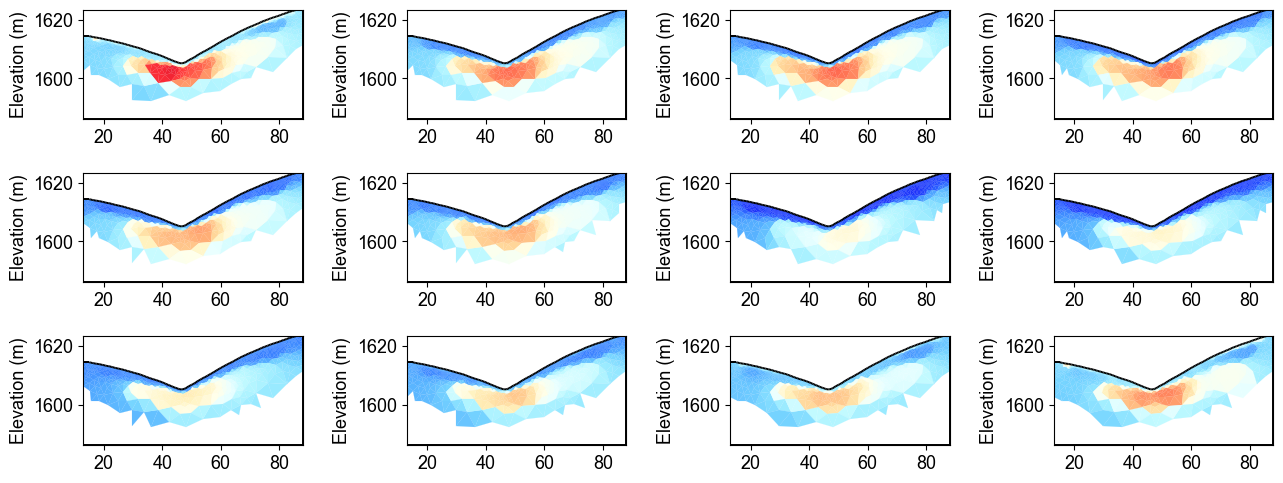

In [10]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result_L1.mesh,result_L1.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()